In [1]:
import pandas
import datetime
import time
import feather
import os
import sys
import numpy
module_path = os.path.abspath(os.path.join('../data_pipeline/'))
if module_path not in sys.path:
    sys.path.append(module_path)
import create_onset_data
# plotting imports
import matplotlib.pyplot as plt
%pylab inline

/usr/local/lib/python2.7/dist-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/usr/local/lib/python2.7/dist-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/usr/local/lib/python2.7/dist-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/usr/local/lib/python2.7/dist-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import hashing, tslib
/usr/local/lib/python2.7/dist-packages/pandas/core/indexes/base.py:7: RuntimeWarning: numpy.dtype size changed, may indicate bi

Populating the interactive namespace from numpy and matplotlib


In [2]:
onsetDF = feather.read_dataframe("../data/binned_data.feather")
onsetDF.head()

,bin_0,bin_1,bin_2,date
0,0,0,1,1996-03-30 04:11:00
1,0,0,1,1996-03-30 04:12:00
2,0,0,1,1996-03-30 04:13:00
3,0,0,1,1996-03-30 04:14:00
4,0,0,1,1996-03-30 04:15:00


In [3]:
# we'll convert the bins into binary out
def onset_binary(row):
    b1 = row["bin_0"]
    b2 = row["bin_1"]
    b3 = row["bin_2"]
    row["out"] = int(str(b3) + str(b2) + str(b1), 2)
    return row

In [4]:
onsetDF = onsetDF.apply( onset_binary, axis=1 )
onsetDF.head()

,bin_0,bin_1,bin_2,date,out
0,0,0,1,1996-03-30 04:11:00,4
1,0,0,1,1996-03-30 04:12:00,4
2,0,0,1,1996-03-30 04:13:00,4
3,0,0,1,1996-03-30 04:14:00,4
4,0,0,1,1996-03-30 04:15:00,4


In [5]:
bins = numpy.arange(9)#numpy.sort( onsetDF["out"].unique() )
hist, binEdges = numpy.histogram(onsetDF["out"], bins=bins)
center = (binEdges[:-1] + binEdges[1:]) / 2

In [6]:
print hist, binEdges

[ 5008 21840 18016  1450  9563  2031   954    73] [0 1 2 3 4 5 6 7 8]


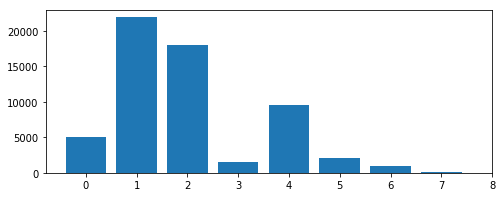

In [7]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(8,3))
ax.bar(center, hist, align='center')
ax.set_xticks(binEdges)
fig.savefig("../plots/class_hist.png")